# Práctico 1 - Procesamiento Digital de Imágenes

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

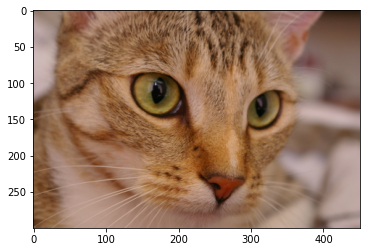

In [4]:
# Cargar la imagen
img_rgb = imageio.imread('imageio:chelsea.png')/255

# Mostrar la imagen
plt.imshow(img_rgb)

## Seleccionar el canal rojo

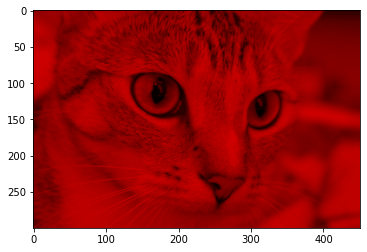

In [5]:
M_rojo = np.array([[1, 0, 0], 
              [0, 0, 0], 
              [0, 0, 0]])

img_canal_rojo = apply_matrix(img_rgb, M_rojo)

plt.imshow(img_canal_rojo)

## Seleccionar canal Verde

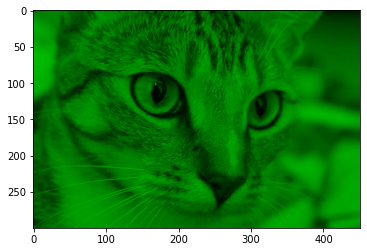

In [6]:
M_verde = np.array([[0,0,0],[0,1,0],[0,0,0]])
img_canal_verde = apply_matrix(img_rgb, M_verde)
plt.imshow(img_canal_verde)

## Seleccionar canal azul

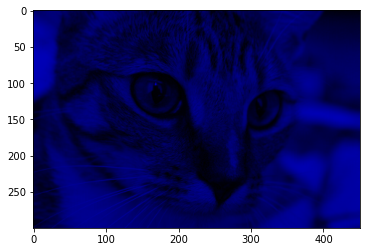

In [7]:
M_azul = np.array([[0,0,0],[0,0,0],[0,0,1]])
img_canal_azul = apply_matrix(img_rgb, M_azul)
plt.imshow(img_canal_azul)

## Imagen en escala de grises

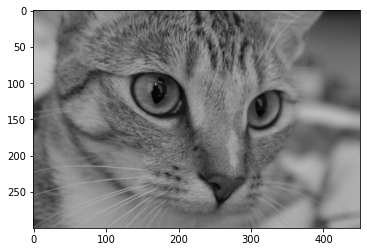

In [8]:
M = np.ones((3,3))/3

img_gris = apply_matrix(img_rgb, M)

plt.imshow(img_gris)

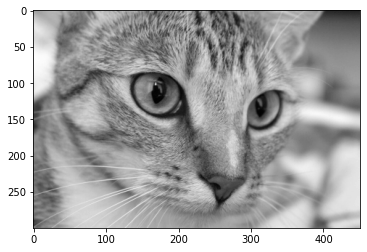

In [9]:
img_gris_2 = img_gris[:,:,0]

plt.imshow(img_gris_2, 'gray')

## Otros mapas de colores

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

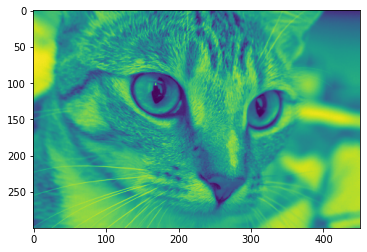

In [10]:
plt.imshow(img_gris_2)

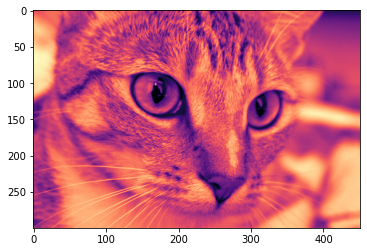

In [11]:
plt.imshow(img_gris_2, 'magma')

## Matriz aleatoria

[[0.85328973 0.26362105 0.82440394]
 [0.20812596 0.2658413  0.1980019 ]
 [0.95479378 0.72624773 0.70308006]]


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

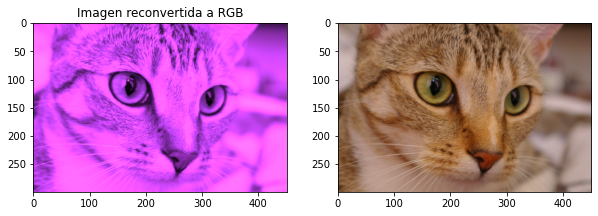

In [12]:
M = np.random.rand(3, 3)

img_random = apply_matrix(img_rgb, M)

M_inv = np.linalg.inv(M)
img_random_inv = apply_matrix(img_random, M_inv)

print(M)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title('Matriz aleatoria')
axes[1].imshow(np.clip(img_random_inv, 0, 1))
axes[0].set_title('Imagen reconvertida a RGB')

## 1. Intercambiar los canales: R->G, G->B, B->R

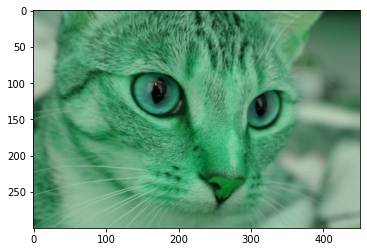

In [13]:
# /B\   /0  0  1\ /R\
# |R| = |1  0  0| |G|
# \G/   \0  1  0/ \B/

M_intercambio = np.array([[0,0,1],[1,0,0],[0,1,0]])
img_canal_intercambio = apply_matrix(img_rgb, M_intercambio)
plt.imshow(img_canal_intercambio)


## 2. Operaciones en el espacio YIQ

1. Convertir la imagen de RGB a YIQ
2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ por $\beta>=0$
3. Convertir la imagen de YIQ a RGB
4. Truncar los valores RGB al rango \[0,1\] (utilizar np.clip)
5. Mostrar la imagen original y la imagen procesada

Text(0.5, 1.0, 'Imagen RGB procesada')

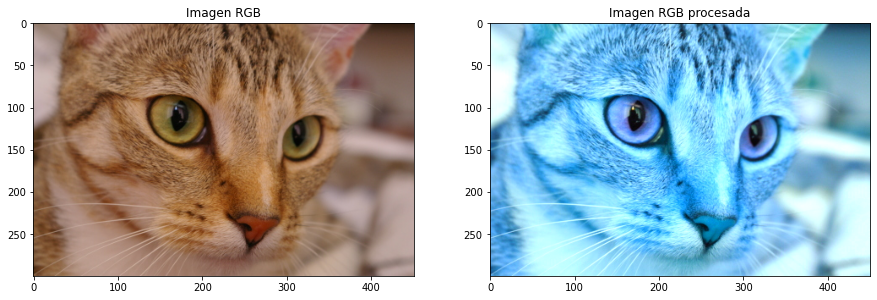

In [14]:
# Declaro las matrices de cambio de espacio cromático

# de YIQ a RGB
YIQ2RGB = np.array([
    [1, 0.9663, 0.6210],
    [1, -0.2721, -0.6474],
    [1, -1.1070, 1.7046]
])

# de RGB a YIQ
RGB2YIQ = np.array([
    [0.299, 0.587, 0.114], 
    [0.595716, -0.274453, -0.321263], 
    [0.211456, -0.522591, 0.311135]
])

img_yiq = apply_matrix(img_rgb, RGB2YIQ)# Convierto de RGB a YIQ


alpha = 1.5 # Valores cercado a 0 para imagen mas "oscura". Cercanos a 1 para imagen mas "clara"
beta  = -2 # beta = 0, no hay color, la imagen se ve en blanco y negro
          

inter = np.array([
    [alpha, 0, 0],
    [0, beta, 0],
    [0, 0, beta]
])

img_yiq = apply_matrix(img_yiq, inter)# Modifico los valores de YIQ

img_rgb_out = apply_matrix(img_yiq, YIQ2RGB) # Cambio de espacio cromático. YIQ-->RGB
img_rgb_out = np.clip(img_rgb_out, 0, 1) # Clamping para valores dentro de [0, 1]

# Muestro la imagen original y la procesada
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[0].set_title('Imagen RGB')
axes[1].imshow(img_rgb_out)
axes[1].set_title('Imagen RGB procesada')

## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

<IPython.core.display.Javascript object>


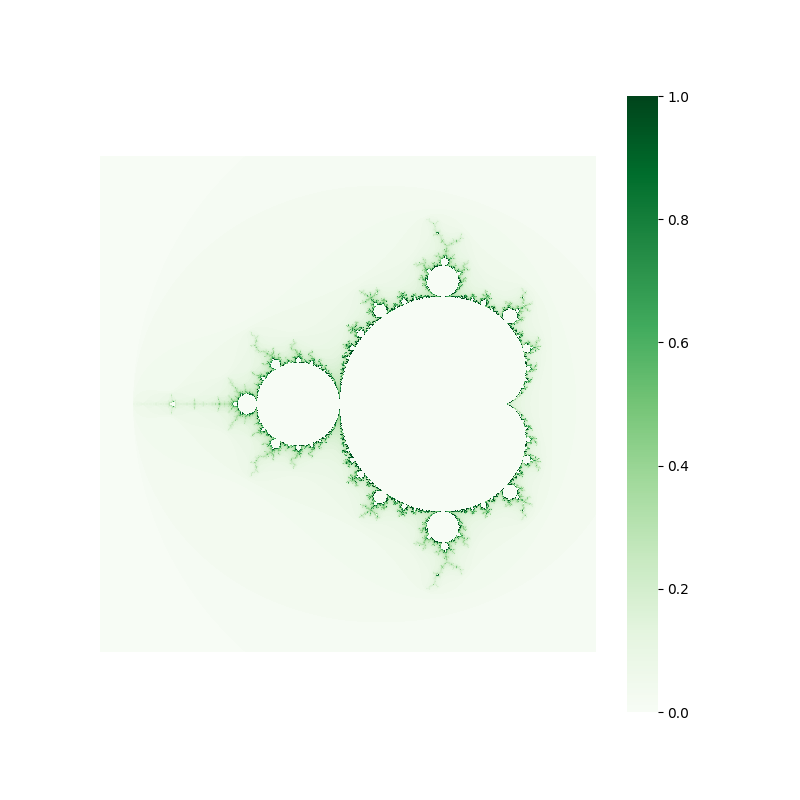

<AxesSubplot:>

In [15]:
import seaborn as sns
%matplotlib notebook

x = np.load('mandelbrot.npy')

fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='Greens', square=True, xticklabels=False, yticklabels=False)